<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_1_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.521374,46.126349,91.795583,0.098960,179.542266,179.445519,0.096747
1,0.0,1.0,43.597104,55.641060,37.060362,-0.041140,146.257386,146.268841,-0.011455
2,0.0,2.0,42.245771,28.009417,91.008599,0.224371,171.488159,171.256943,0.231216
3,0.0,3.0,82.741437,83.578675,66.090213,0.042533,242.452857,242.413645,0.039212
4,0.0,4.0,60.942767,32.624857,29.068411,0.101497,132.737532,132.590207,0.147324
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,21.538788,36.852793,48.001877,0.107841,116.501298,116.400611,0.100687
119996,999.0,116.0,82.625377,77.975401,96.724699,-0.026293,267.299185,267.343219,-0.044034
119997,999.0,117.0,28.230981,39.797525,35.693798,0.068947,113.791251,113.721962,0.069289
119998,999.0,118.0,78.054750,96.061103,22.416001,0.094073,206.625928,206.517139,0.108788


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.521374  46.126349  91.795583  ...  179.542266  179.445519  0.096747
      1.0    43.597104  55.641060  37.060362  ...  146.257386  146.268841 -0.011455
      2.0    42.245771  28.009417  91.008599  ...  171.488159  171.256943  0.231216
      3.0    82.741437  83.578675  66.090213  ...  242.452857  242.413645  0.039212
      4.0    60.942767  32.624857  29.068411  ...  132.737532  132.590207  0.147324
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  21.538788  36.852793  48.001877  ...  116.501298  116.400611  0.100687
      116.0  82.625377  77.975401  96.724699  ...  267.299185  267.343219 -0.044034
      117.0  28.230981  39.797525  35.693798  ...  113.791251  113.721962  0.069289
      118.0  78.054750  96.061103  22.416001  ...  206.625928  206.517139  0.108788
      119.0  88.248190  90.306830  54.040293  ...  242.522413  242.592282 -0.069869

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.521374  46.126349  91.795583  ...  179.542266  179.445519  0.096747
      1.0    43.597104  55.641060  37.060362  ...  146.257386  146.268841 -0.011455
      2.0    42.245771  28.009417  91.008599  ...  171.488159  171.256943  0.231216
      3.0    82.741437  83.578675  66.090213  ...  242.452857  242.413645  0.039212
      4.0    60.942767  32.624857  29.068411  ...  132.737532  132.590207  0.147324
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  21.538788  36.852793  48.001877  ...  116.501298  116.400611  0.100687
      116.0  82.625377  77.975401  96.724699  ...  267.299185  267.343219 -0.044034
      117.0  28.230981  39.797525  35.693798  ...  113.791251  113.721962  0.069289
      118.0  78.054750  96.061103  22.416001  ...  206.625928  206.517139  0.108788
      119.0  88.248190  90.306830  54.040293  ...  242.522413  242.592282 -0.069869

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.521374,46.126349,91.795583,0.098960,179.542266,179.445519,0.096747
1,0.0,1.0,43.597104,55.641060,37.060362,-0.041140,146.257386,146.268841,-0.011455
2,0.0,2.0,42.245771,28.009417,91.008599,0.224371,171.488159,171.256943,0.231216
3,0.0,3.0,82.741437,83.578675,66.090213,0.042533,242.452857,242.413645,0.039212
4,0.0,4.0,60.942767,32.624857,29.068411,0.101497,132.737532,132.590207,0.147324
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,21.538788,36.852793,48.001877,0.107841,116.501298,116.400611,0.100687
119996,999.0,116.0,82.625377,77.975401,96.724699,-0.026293,267.299185,267.343219,-0.044034
119997,999.0,117.0,28.230981,39.797525,35.693798,0.068947,113.791251,113.721962,0.069289
119998,999.0,118.0,78.054750,96.061103,22.416001,0.094073,206.625928,206.517139,0.108788


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.521374  46.126349  91.795583  ...  179.542266  179.445519  0.096747
      1.0    43.597104  55.641060  37.060362  ...  146.257386  146.268841 -0.011455
      2.0    42.245771  28.009417  91.008599  ...  171.488159  171.256943  0.231216
      3.0    82.741437  83.578675  66.090213  ...  242.452857  242.413645  0.039212
      4.0    60.942767  32.624857  29.068411  ...  132.737532  132.590207  0.147324
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  21.538788  36.852793  48.001877  ...  116.501298  116.400611  0.100687
      116.0  82.625377  77.975401  96.724699  ...  267.299185  267.343219 -0.044034
      117.0  28.230981  39.797525  35.693798  ...  113.791251  113.721962  0.069289
      118.0  78.054750  96.061103  22.416001  ...  206.625928  206.517139  0.108788
      119.0  88.248190  90.306830  54.040293  ...  242.522413  242.592282 -0.069869

[120000 rows x 7 columns]

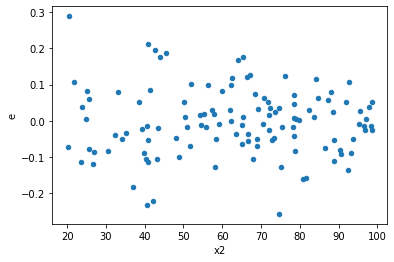

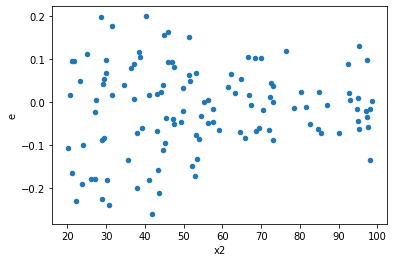

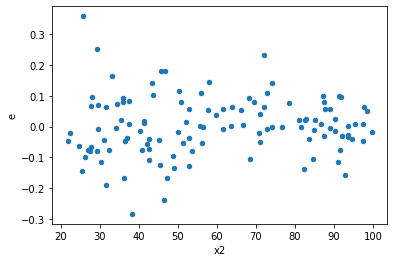

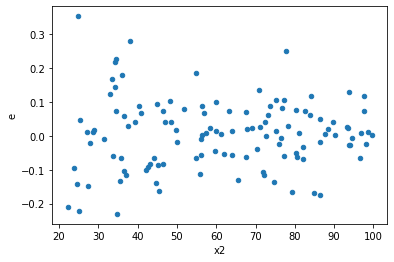

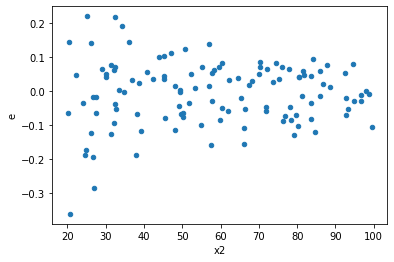

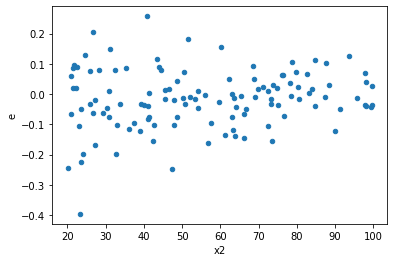

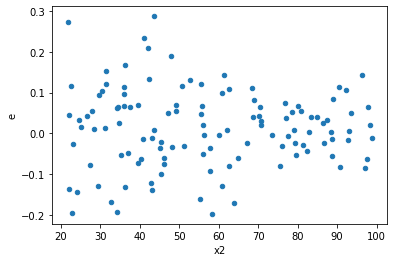

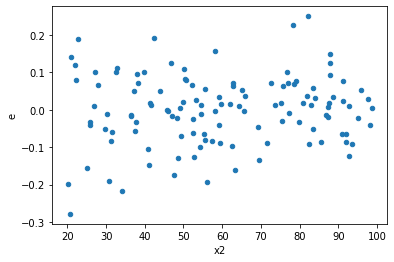

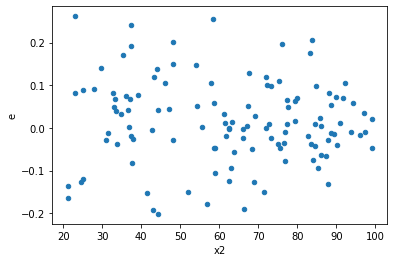

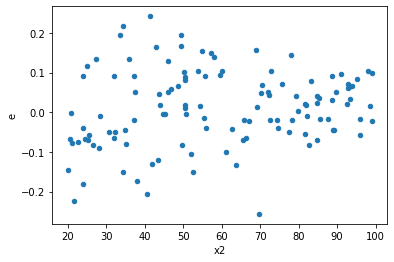

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,51.0,63.0,0.39409497823743045,0.6412004436934501,0.00772735251445942,0.010177784820530954,1.3171114947177944,0.29732840167423213,0.8513357991628839,0.14866420083711607,Reject005=1 : Homoscedasticity
6.0,61.0,53.0,0.29223376476540075,0.5800654885412684,0.0047907174551705045,0.010944631859269215,2.2845496445332922,0.0025193440420978597,0.9987403279789511,0.0012596720210489298,Reject005=0 : Heteroscedasticity
7.0,56.0,58.0,0.33268643688377547,0.7343816852478187,0.005940829230067419,0.012661753193927908,2.131310748648504,0.004824308231416996,0.9975878458842915,0.002412154115708498,Reject005=0 : Heteroscedasticity
8.0,51.0,63.0,0.3388717590931841,0.4595103118615851,0.0066445442959447865,0.007293814473993414,1.0977147790925077,0.720102556330382,0.639948721834809,0.360051278165191,Reject005=1 : Homoscedasticity
13.0,54.0,60.0,0.5582964382124833,0.6421128703334932,0.010338822929860802,0.010701881172224887,1.0351160131890345,0.8932152367614483,0.5533923816192758,0.44660761838072416,Reject005=1 : Homoscedasticity
15.0,53.0,61.0,0.2729011994213062,0.7980583540552189,0.0051490792343642676,0.013082923836970801,2.5408278337721266,0.0005044667977911477,0.9997477666011044,0.00025223339889557383,Reject005=0 : Heteroscedasticity
17.0,55.0,59.0,0.4311292206321862,0.5346614560508051,0.007838713102403387,0.00906205857713229,1.1560645808498615,0.5836617015528969,0.7081691492235516,0.29183085077644844,Reject005=1 : Homoscedasticity
18.0,42.0,72.0,0.2512409555999095,0.8335433314029085,0.00598192751428356,0.011576990713929284,1.935327816374557,0.013617621720496853,0.9931911891397516,0.0068088108602484265,Reject005=0 : Heteroscedasticity
19.0,48.0,66.0,0.39159310077565207,0.6471089598353166,0.008158189599492752,0.009804681209626008,1.2018207091234592,0.48441001066104894,0.7577949946694755,0.24220500533052447,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,50.0,64.0,0.5215662274183246,0.6600944590771162,0.010431324548366492,0.01031397592307994,0.9887503619753708,0.9750844856223041,Reject005=1 : Homoscedasticity
1.0,71.0,43.0,0.7572077986606054,0.2686135861410888,0.010664898572684583,0.006246827584676484,0.58573717716136,0.045195932645229114,Reject005=0 : Heteroscedasticity
2.0,51.0,63.0,0.39409497823743045,0.6412004436934501,0.00772735251445942,0.010177784820530954,1.3171114947177944,0.29732840167423213,Reject005=1 : Homoscedasticity
3.0,55.0,59.0,0.8269610989671095,0.5100730346456602,0.015035656344856535,0.008645305671960342,0.5749869160129991,0.03977948005807649,Reject005=0 : Heteroscedasticity
4.0,60.0,54.0,0.7581951096288702,0.4595442451476419,0.012636585160481169,0.00851007861384522,0.6734476526505819,0.136540433612527,Reject005=1 : Homoscedasticity
5.0,57.0,57.0,1.0859972649350056,0.3118376415731079,0.019052583595350975,0.005470835817072068,0.2871440395310486,5.360501761668228e-06,Reject005=0 : Heteroscedasticity
6.0,61.0,53.0,0.29223376476540075,0.5800654885412684,0.0047907174551705045,0.010944631859269215,2.2845496445332922,0.0025193440420978597,Reject005=0 : Heteroscedasticity
7.0,56.0,58.0,0.33268643688377547,0.7343816852478187,0.005940829230067419,0.012661753193927908,2.131310748648504,0.004824308231416996,Reject005=0 : Heteroscedasticity
8.0,51.0,63.0,0.3388717590931841,0.4595103118615851,0.0066445442959447865,0.007293814473993414,1.0977147790925077,0.720102556330382,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      567
Reject005=0 : Heteroscedasticity    433
Name: Result_test, dtype: int64